In [25]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np

X, y = load_boston(return_X_y=True)

descriptions = load_boston()['DESCR']

print(descriptions)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [51]:
assert np.all(load_boston()['feature_names'][[0,9]] == ['CRIM1', 'TAX']), 'Feature selection failed'

AssertionError: Feature selection failed

In [39]:
np.array([0, 9])

array([0, 9])

In [6]:
X.shape

(506, 13)

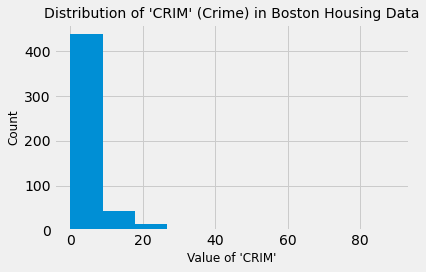

In [59]:
def select_crime_and_taxes(X):
    """ Custom selector for the Boston Housing dataset
    Accepts X, array of 13 features described in sklearn.datasets.load_boston
    Returns only the columns of X corresponding to the features 'CRIM': per capita crime rate, and 'TAX': full-value property-tax rate per $10,000"""
    # select columns in positions 0 and 9, drop remaining columns 
    return X[:, [0,9]]

crime_and_taxes_pipe = Pipeline(
    [('feature_selector', FunctionTransformer(select_taxes_and_crime))]
)

plt.style.use('fivethirtyeight')
plt.hist(crime_and_taxes_pipe.fit_transform(X)[:,0])
plt.title("Distribution of 'CRIM' (Crime) in Boston Housing Data",fontsize=14)
plt.xlabel("Value of 'CRIM'", fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.tight_layout()
plt.savefig('./crime_distribution.png');

In [26]:
crime_and_taxes_pipe2 = Pipeline(
    [('feature_selector', FunctionTransformer(select_taxes_and_crime)),
    ('log_scaler', FunctionTransformer(np.log))]
)

Text(0.5, 1.0, "Distribution of 'CRIM' (Crime) in Boston Housing Data After Log-scaling")

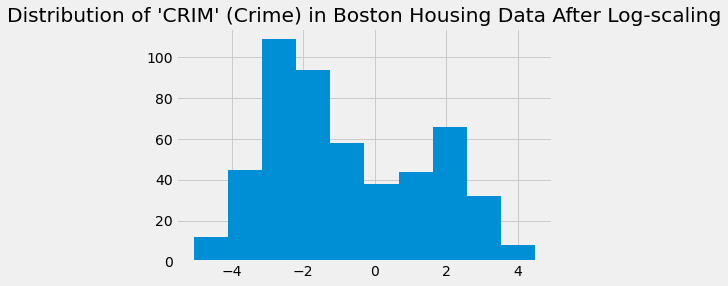

In [30]:
plt.hist(crime_and_taxes_pipe2.fit_transform(X)[:,0])
plt.title("Distribution of 'CRIM' (Crime) in Boston Housing Data After Log-scaling")
plt.savefig('./crime_distribution_log_scaled@2x.png');

In [61]:
from sklearn.datasets import load_diabetes

print(load_diabetes()['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, T-Cells (a type of white blood cells)
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, thyroid stimulating hormone
      - s5      ltg, lamotrigine
      - s6      glu, blood sugar level

Note: Each of these 10 feature va